In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
df=pd.read_csv("heart_disease_uci.csv")
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.isna().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [5]:
df.drop(columns=['id','dataset'], inplace=True)

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [8]:
numerical_cols = ['trestbps', 'thalch', 'oldpeak','chol']
df.fillna({
    'trestbps': df['trestbps'].median(),
    'thalch': df['thalch'].median(),
    'oldpeak': df['oldpeak'].median(),
    'chol': df['chol'].median()
}, inplace=True)

In [9]:
categorical_cols = ['exang', 'slope', 'ca', 'thal', 'fbs', 'restecg']
df.fillna({
    'exang':df['exang'].mode()[0], 
 'slope': df['slope'].mode()[0], 
 'ca':df['ca'].mode()[0], 
 'thal':df['thal'].mode()[0],
  'fbs':df['fbs'].mode()[0],
  'restecg':df['restecg'].mode()[0],
}, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_9028\1950906771.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna({


In [10]:
label_encoder = LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['cp']= label_encoder.fit_transform(df['cp'])

In [11]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

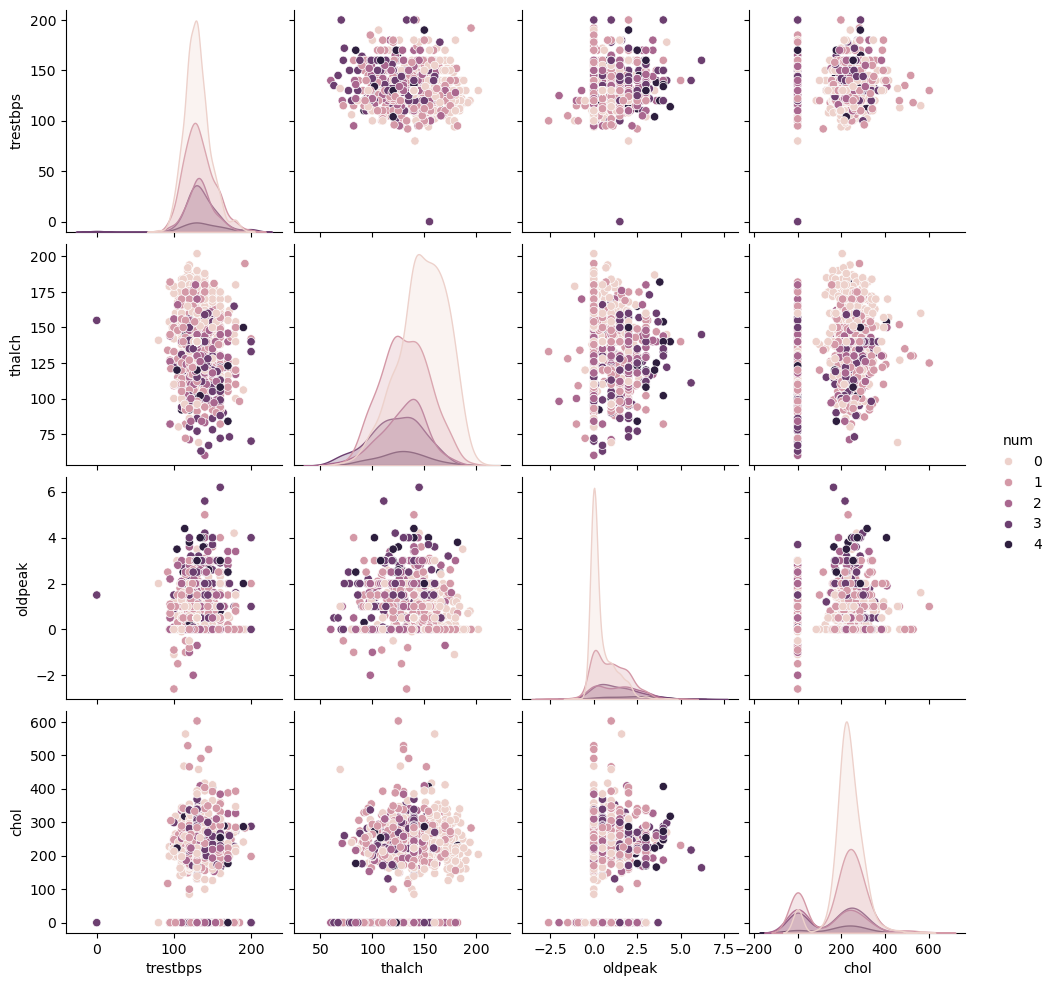

In [12]:
sns.pairplot(df[numerical_cols + ['num']], hue='num')
plt.show()

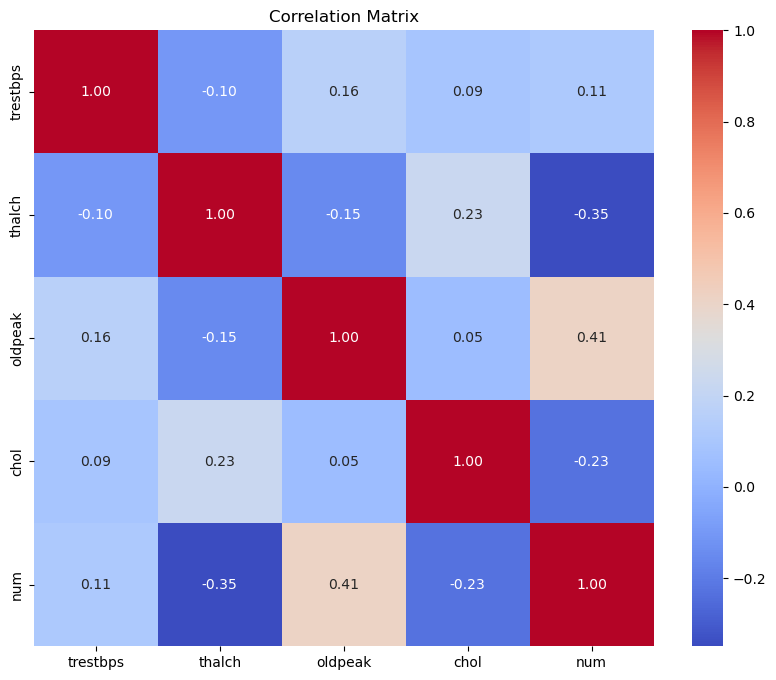

In [13]:
corr = df[numerical_cols + ['num']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [14]:
df_encoded=pd.get_dummies(df,columns=categorical_cols , drop_first=True)

In [15]:
x = df_encoded.drop('num', axis=1)
y = df_encoded['num']

In [17]:
x_train,x_test,y_train, y_test=train_test_split(x,y ,test_size=0.2,random_state=42)

In [18]:
scaler=StandardScaler()
x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [19]:
logistic_model = LogisticRegression()
rf_model = RandomForestClassifier()
gb_model= GradientBoostingClassifier()

In [21]:
logistic_model.fit(x_train, y_train)
rf_model.fit(x_train , y_train)
gb_model.fit(x_train, y_train)

E:\anacondna\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier()

In [22]:
logistic_preds=logistic_model.predict(x_test)
rf_preds = rf_model.predict(x_test)
gb_preds = gb_model.predict(x_test)

In [24]:
def evaluate_model(model_name, y_test, predictions):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("\n")

evaluate_model("Logistic Regression", y_test, logistic_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("Gradient Boosting", y_test, gb_preds)


Model: Logistic Regression
Accuracy: 0.5271739130434783
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.91      0.76        75
           1       0.41      0.44      0.42        54
           2       0.10      0.04      0.06        25
           3       0.36      0.15      0.22        26
           4       0.00      0.00      0.00         4

    accuracy                           0.53       184
   macro avg       0.30      0.31      0.29       184
weighted avg       0.45      0.53      0.47       184

Confusion Matrix:
[[68  7  0  0  0]
 [27 24  1  2  0]
 [ 4 16  1  4  0]
 [ 5 10  7  4  0]
 [ 0  2  1  1  0]]


Model: Random Forest
Accuracy: 0.5597826086956522
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        75
           1       0.47      0.50      0.48        54
           2       0.33      0.20      0.25        25
           3       0.21      0.

E:\anacondna\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anacondna\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anacondna\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anacondna\Lib\site-packages\sklearn\metrics\_classification.py:1509: Unde